### Student Information
Name:龔友謙

Student ID:112030512

GitHub ID:Albert-Kung

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [672]:
### Begin Assignment Here

# Part 1

## 1. The Data (略過)

## 2. Data Preparation
In the following we will use the built-in dataset loader for 20 newsgroups from scikit-learn. Alternatively, it is possible to download the dataset manually from the website and use the sklearn.datasets.load_files function by pointing it to the 20news-bydate-train sub-folder of the uncompressed archive folder.

In order to get faster execution times for this first example we will work on a partial dataset with only 4 categories out of the 20 available in the dataset:

In [673]:
#Prepare materials we may need in this part
%load_ext autoreload
%autoreload 2
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import data_mining_helpers as dmh
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import math
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sandy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [674]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
attributes = [attr for attr in dir(twenty_train) if not attr.startswith("_")]

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [675]:
# Answer here
for t in twenty_train.data[:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

## 3. Data Transformation
So we want to explore and understand our data a little bit better. Before we do that we definitely need to apply some transformations just so we can have our dataset in a nice format to be able to explore it freely and more efficient. Lucky for us, there are powerful scientific tools to transform our data into that tabular format we are so farmiliar with. So that is what we will do in the next section--transform our data into a nice table format.

In [676]:
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

## Exercise 2 (take home)

In [677]:
#Answer here
# Select category > 1
print(X[X['category'] > 1])
# Use boolean to select first 10 category_name is comp.graphics or sci.med
print(X[(X['category_name'] == 'comp.graphics') | (X['category_name'] == 'sci.med')].head(10))

                                                   text  category  \
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
5     soc.religion.christian  
6     soc.religi

## 4. Data Mining using Pandas

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [678]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [679]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

## ANSWER here
#Because row 2,3,5 are not missing values. They are all strings 
#Row 2 has the value 'NaN' ,Row 3 has the value 'None', Row 3 has the empty string.

## >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

## Answer here
1. After Sampling the index does not display in order
2. After Sampling the data only shows the number you set(in this example is 1000), it will also cause the difference in data distribution

## 5.  Data Preprocessing

In [680]:
X_sample = X.sample(n=1000,random_state=42)

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

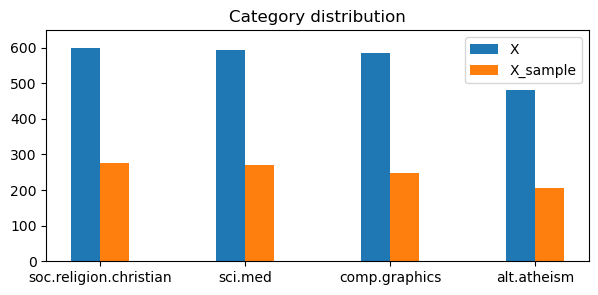

In [681]:
# Answer here
import matplotlib.pyplot as plt

counts_X = X.category_name.value_counts()
counts_X_sample = X_sample.category_name.value_counts()

fig, ax = plt.subplots(figsize=(7, 3))
bar_width = 0.2

categories = counts_X.index
positions_X = range(len(categories))
positions_X_sample = [pos + bar_width for pos in positions_X]

# Plot the bar chart for X and X_sample
plt.bar(positions_X, counts_X, bar_width, label='X')
plt.bar(positions_X_sample, counts_X_sample, bar_width, label='X_sample')

# Set chart title and labels
plt.title('Category distribution')
plt.ylim(0, max(counts_X.max(), counts_X_sample.max()) + 50)
plt.xticks([pos + bar_width / 2 for pos in positions_X], categories)
plt.legend()

plt.show()


In [682]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [683]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [684]:
# Answer here
count=0
for i in range(len(X_counts.toarray())):
    if(X_counts[4,i]==1):
        count+=1
        if count==2:
            index=i
            break
count_vect.get_feature_names_out()[i]

'01'

In [685]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]

,term_00,term_000,term_0000,term_0000001200,term_000005102000,term_0001,term_000100255pixel,term_00014,term_000406,term_0007,term_000usd,term_0010,term_001004,term_0010580b,term_001125,term_001200201pixel,term_0014,term_001642,term_00196,term_002
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


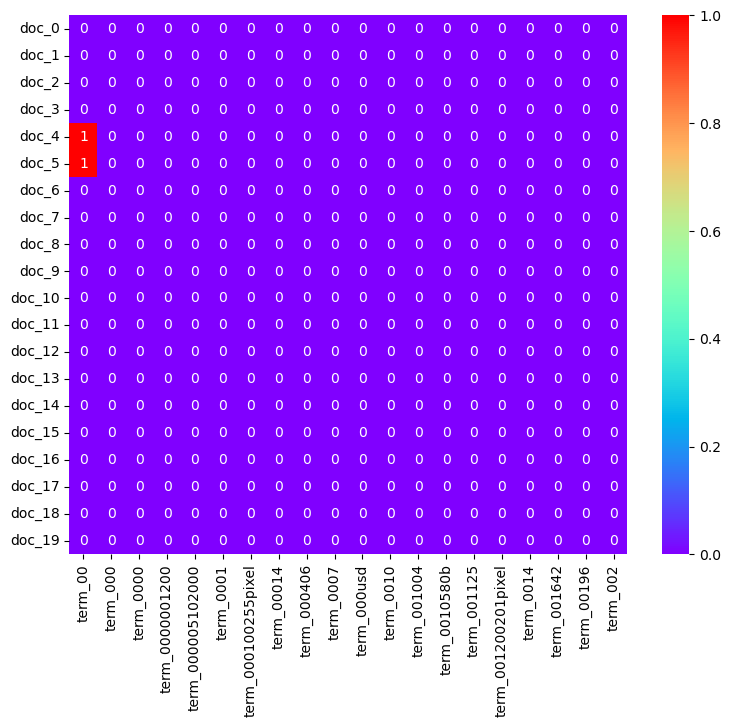

In [686]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="rainbow",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

,term_00,term_000,term_0000,term_0000001200,term_000005102000,term_0001,term_000100255pixel,term_00014,term_000406,term_0007,...,term_010702,term_011255,term_011308pxf3,term_011605,term_011720,term_012019,term_012536,term_012946,term_013,term_013034
doc_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


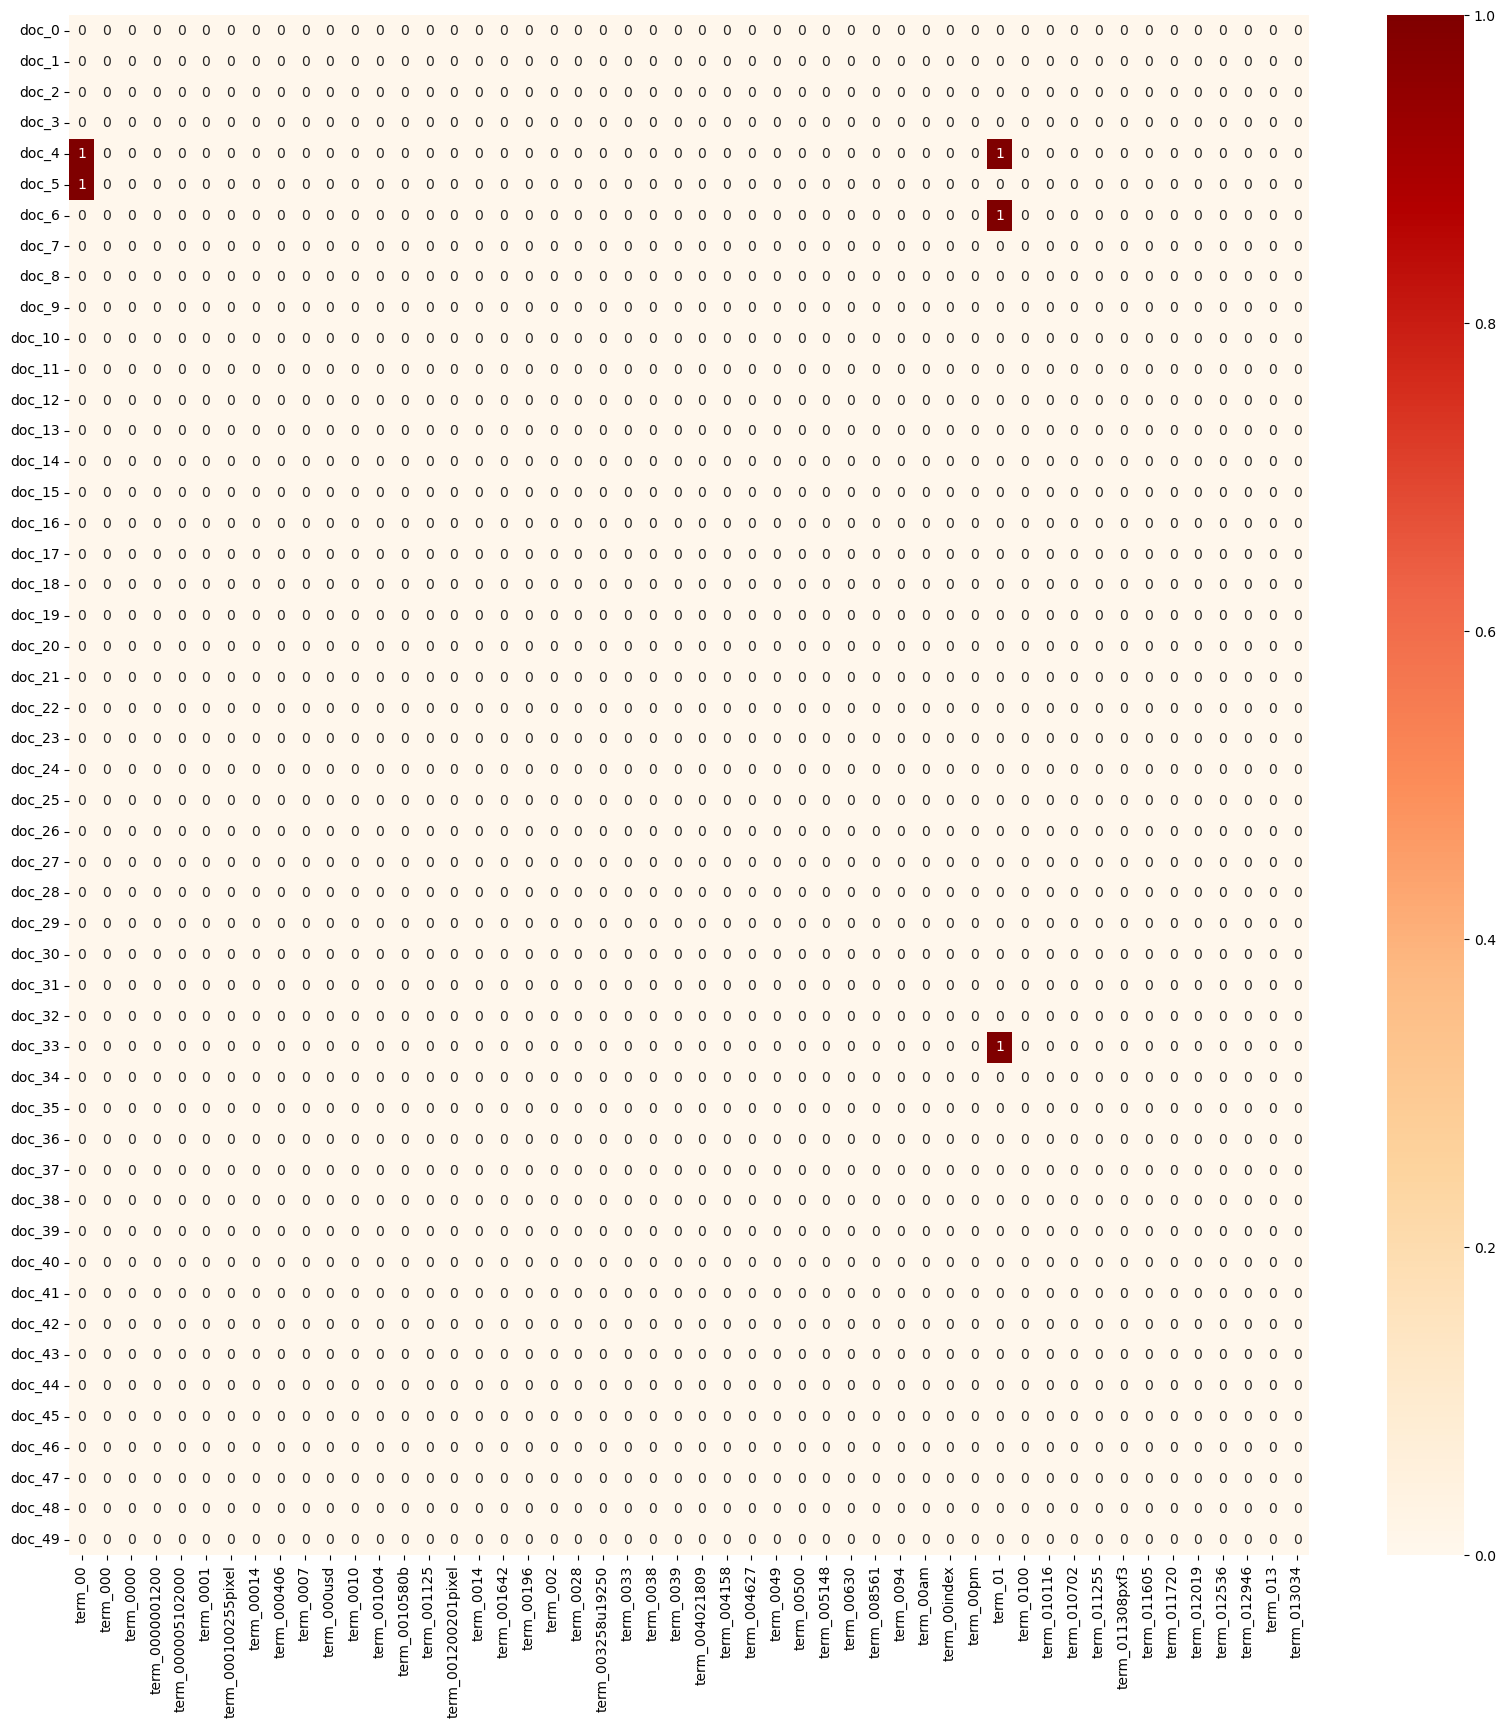

In [687]:
# Answer here
#Make a bigger heat map contains more information
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:50]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:50]]
plot_z = X_counts[0:50, 0:50].toarray()
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(20, 20))
ax = sns.heatmap(df_todraw,
                 cmap="OrRd",
                 vmin=0, vmax=1, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

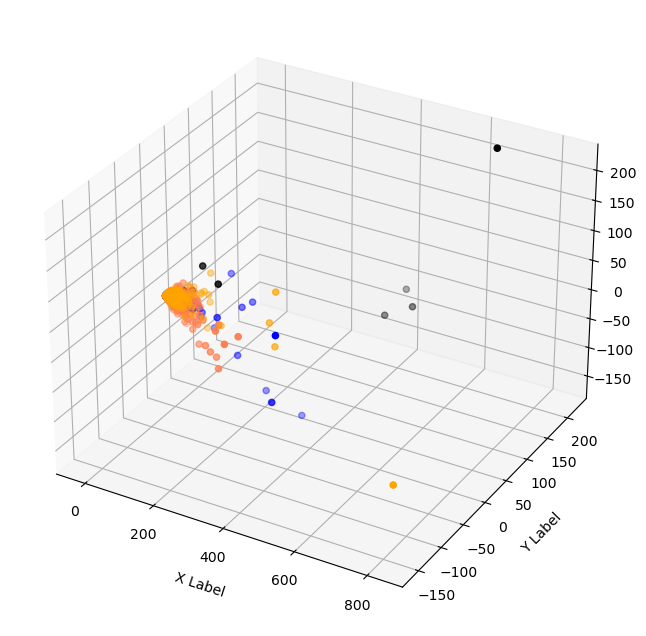

In [688]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (10,8))
#ax = Axes3D(fig, elev=60, azim=30)
ax = fig.add_subplot(111, projection='3d')
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

In [689]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

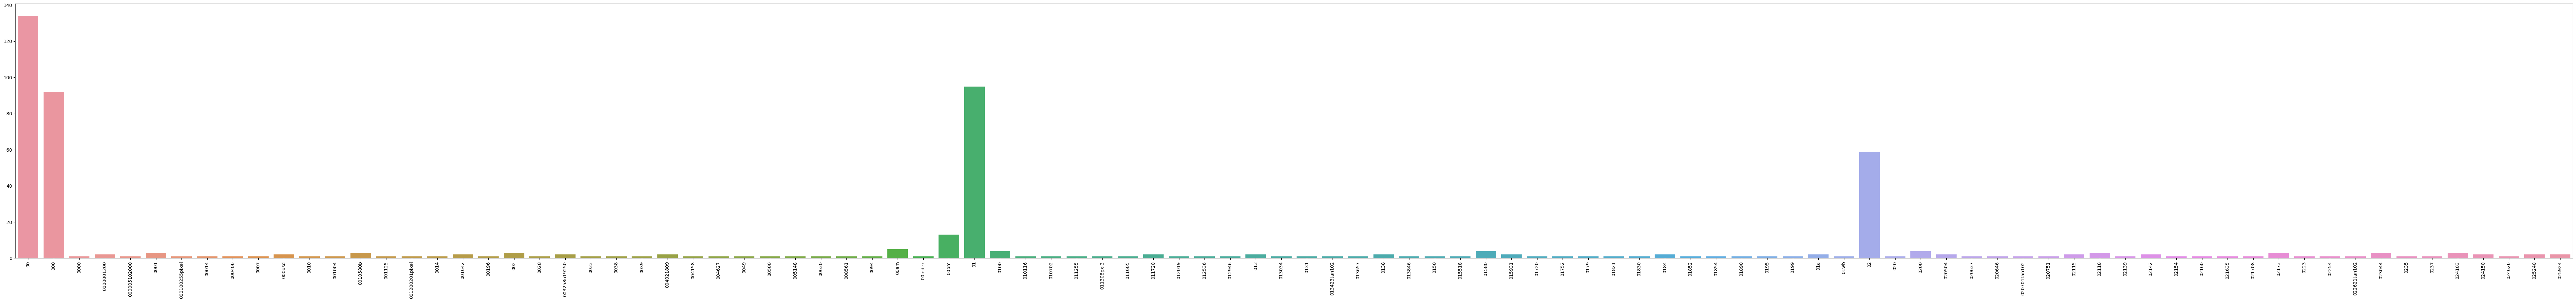

In [690]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:100], 
            y=term_frequencies[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [691]:
import plotly.express as px
import plotly.graph_objects as go

x_data = count_vect.get_feature_names()[:300]
y_data = term_frequencies[:300]

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=x_data,
        y=y_data,
    )
)

fig.update_layout(
    xaxis_title="Words",
    yaxis_title="Frequency",
    title_text="Word Frequency Bar Chart",
    title_x=0.5,  
    width=800,
    height=400,
)
fig.show()


C:\Users\Sandy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [699]:
term_frequencies

array([134,  92,   1, ...,   1,   1,   1], dtype=int64)

[134,
 92,
 5,
 13,
 95,
 4,
 4,
 59,
 4,
 100,
 5,
 24,
 47,
 4,
 4,
 62,
 5,
 18,
 27,
 7,
 40,
 5,
 5,
 34,
 4,
 378,
 105,
 20,
 19,
 4,
 8,
 7,
 5,
 7,
 4,
 5,
 5,
 6,
 11,
 5,
 215,
 16,
 4,
 6,
 6,
 5,
 5,
 8,
 10,
 4,
 5,
 4,
 5,
 7,
 5,
 7,
 4,
 4,
 236,
 9,
 9,
 4,
 5,
 5,
 5,
 8,
 15,
 82,
 32,
 219,
 32,
 4,
 8,
 10,
 11,
 8,
 7,
 5,
 5,
 7,
 5,
 5,
 14,
 239,
 7,
 7,
 18,
 8,
 6,
 4,
 4,
 4,
 9,
 5,
 8,
 7,
 9,
 4,
 7,
 293,
 25,
 5,
 4,
 4,
 12,
 6,
 4,
 4,
 4,
 4,
 6,
 4,
 5,
 278,
 4,
 4,
 5,
 6,
 5,
 7,
 5,
 4,
 192,
 5,
 8,
 5,
 5,
 5,
 5,
 184,
 8,
 5,
 5,
 208,
 32,
 4,
 4,
 6,
 4,
 4,
 10,
 5,
 5,
 4,
 6,
 4,
 4,
 7,
 4,
 6,
 7,
 10,
 10,
 15,
 13,
 20,
 46,
 35,
 26,
 40,
 83,
 488,
 4,
 7,
 5,
 13,
 14,
 29,
 61,
 31,
 23,
 6,
 39,
 10,
 17,
 13,
 20,
 5,
 23,
 39,
 17,
 5,
 4,
 4,
 6,
 5,
 7,
 6,
 4,
 4,
 4,
 9,
 5,
 23,
 324,
 50,
 47,
 4,
 6,
 10,
 4,
 8,
 14,
 4,
 11,
 8,
 17,
 9,
 192,
 6,
 4,
 22,
 7,
 18,
 10,
 13,
 7,
 142,
 5,
 4,
 4,
 4,
 5,
 7,
 6,
 8,

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [716]:
# Answer here

# There are many words with really low frequency, so we can reserve words with Frequency > 3
filtered_x = [word for word, frequency in zip(x_data, y_data) if frequency > 3]
filtered_y = [frequency for frequency in y_data if frequency > 3]

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=filtered_x,
        y=filtered_y,
    )
)

fig.update_layout(
    xaxis_title="Words",
    yaxis_title="Frequency",
    title_text="Word Frequency Bar Chart (Frequency > 3)",
    title_x=0.5,
    width=800,
    height=400,
)
fig.show()


### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [718]:
# Answer here

# Sort the data in descending order by frequency
sorted_data = sorted(zip(x_data, y_data), key=lambda item: item[1], reverse=True)
sorted_x, sorted_y = zip(*sorted_data)

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=sorted_x,
        y=sorted_y,
    )
)

fig.update_layout(
    xaxis_title="Words",
    yaxis_title="Frequency",
    title_text="Word Frequency Bar Chart (Long Tail)",
    title_x=0.5,
    width=800,
    height=400,
)
fig.show()


In [576]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [577]:
mlb = preprocessing.LabelBinarizer()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [578]:
# Answer here
# Based on the result it works! 

mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


# Part 2

## 1. Data Preparation

In [579]:
import pandas as pd
data_amazon = pd.read_table(r'.\sentiment labelled sentences\amazon_cells_labelled.txt', header=None, names=["sentences", "label"])
data_imdb = pd.read_table(r'.\sentiment labelled sentences\imdb_labelled.txt', header=None, names=["sentences", "label"])
data_yelp = pd.read_table(r'.\sentiment labelled sentences\yelp_labelled.txt', header=None, names=["sentences", "label"])


In [580]:
df=pd.concat([data_amazon,data_imdb,data_yelp],axis=0,ignore_index=True)
df

,sentences,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


In [581]:
len(df)

2748

In [582]:
df.sentences[0].split("\n")

['So there is no way for me to plug it in here in the US unless I go by a converter.']

In [583]:
for t in df.sentences[:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


## 2. Data Transformation

In [584]:
len(df)

2748

In [585]:
df[0:2]

,sentences,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1


In [586]:
for t in df["sentences"][:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


## 3. Data Mining using Pandas

### 3.1 Missing Values

In [587]:
# check missing values
df.isnull()

,sentences,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2743,False,False
2744,False,False
2745,False,False
2746,False,False


In [588]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentences,label
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [589]:
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2743    (The amoung of missing records is: , 0)
2744    (The amoung of missing records is: , 0)
2745    (The amoung of missing records is: , 0)
2746    (The amoung of missing records is: , 0)
2747    (The amoung of missing records is: , 0)
Length: 2748, dtype: object

### 3.2 Dealing with Duplicate Data

In [590]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [591]:
sum(df.duplicated())

17

In [592]:
df.drop_duplicates(keep=False, inplace=True)

In [593]:
len(df)

2714

## 4.  Data Preprocessing

### 4.1 Sampling

In [594]:
print(df.shape)
df_sample = df.sample(n=1000,random_state=42)
display(df_sample)

(2714, 2)


,sentences,label
517,I received my orders well within the shipping ...,1
2040,"The staff is great, the food is delish, and th...",1
1933,I ordered the Lemon raspberry ice cocktail whi...,1
950,It is a joy to use.,1
2711,After all the rave reviews I couldn't wait to ...,0
...,...,...
1316,It is indescribably the most annoying and idio...,0
1950,The warm beer didn't help.,0
1019,The structure of this film is easily the most...,0
1113,This film has no redeeming features.,0


In [595]:
len(df_sample)

1000

In [596]:
df_sample[0:4]

,sentences,label
517,I received my orders well within the shipping ...,1
2040,"The staff is great, the food is delish, and th...",1
1933,I ordered the Lemon raspberry ice cocktail whi...,1
950,It is a joy to use.,1


1    1366
0    1348
Name: label, dtype: int64


<AxesSubplot: title={'center': 'label distribution'}>

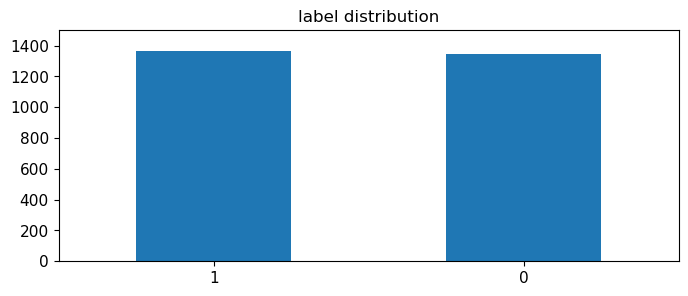

In [597]:
print(df.label.value_counts())

# plot barchart for df
df.label.value_counts().plot(kind = 'bar',
                                    title = 'label distribution',
                                    ylim = [0, 1500],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

1    511
0    489
Name: label, dtype: int64


<AxesSubplot: title={'center': 'label distribution'}>

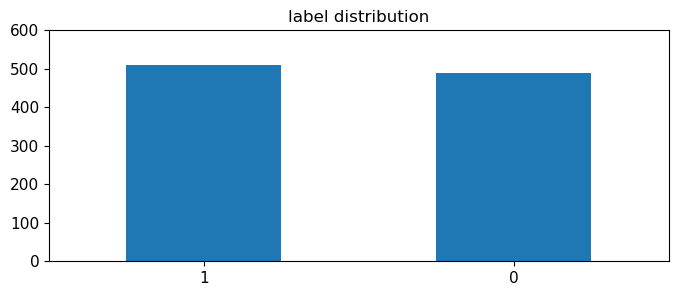

In [598]:
print(df_sample.label.value_counts())

# plot barchart for df
df_sample.label.value_counts().plot(kind = 'bar',
                                    title = 'label distribution',
                                    ylim = [0, 600],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

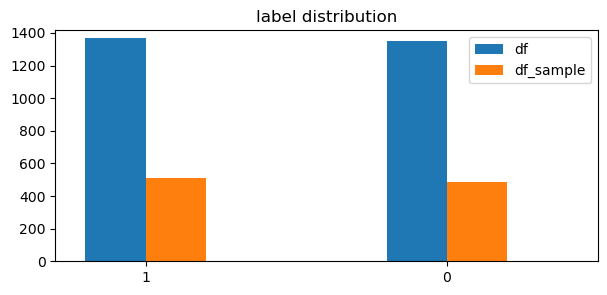

In [599]:
counts_df = df.label.value_counts()
counts_df_sample = df_sample.label.value_counts()

fig, ax = plt.subplots(figsize=(7, 3))
bar_width = 0.2

label = counts_df.index
positions_df = range(len(label))
positions_df_sample = [pos + bar_width for pos in positions_df]

# Plot the bar chart for df and df_sample
plt.bar(positions_df, counts_df, bar_width, label='df')
plt.bar(positions_df_sample, counts_df_sample, bar_width, label='df_sample')

# Set chart title and labels
plt.title('label distribution')
plt.xlim(positions_df[0] - bar_width, positions_df_sample[-1] + bar_width * 2)
plt.ylim(0, max(counts_df.max(), counts_df_sample.max()) + 50)
plt.xticks([pos + bar_width / 2 for pos in positions_df], label)
plt.legend(loc='upper right')

plt.show()

### 4.2 Feature Creation

In [600]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sandy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [601]:
df['unigrams'] = df['sentences'].apply(lambda x: dmh.tokenize_text(x))

In [602]:
df[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [603]:
df[0:4]

,sentences,label,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."


In [604]:
list(df[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### 4.3 Feature subset selection

In [605]:
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentences) #learn the vocabulary and return document-term matrix
print(df_counts.shape)
print(df_counts[0])

(2714, 5153)
  (0, 4159)	1
  (0, 4543)	1
  (0, 2426)	1
  (0, 3042)	1
  (0, 4985)	1
  (0, 1828)	1
  (0, 2808)	1
  (0, 4607)	1
  (0, 3385)	1
  (0, 2431)	1
  (0, 2313)	2
  (0, 2157)	1
  (0, 4529)	1
  (0, 4833)	1
  (0, 4791)	1
  (0, 1981)	1
  (0, 646)	1
  (0, 1012)	1


In [606]:
analyze = count_vect.build_analyzer()
analyze(df.sentences[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [607]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [608]:
df_counts.shape

(2714, 5153)

In [609]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [610]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,term_18,term_18th,term_1928,term_1947,term_1948,term_1949,term_1971,term_1973,term_1979,term_1980
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


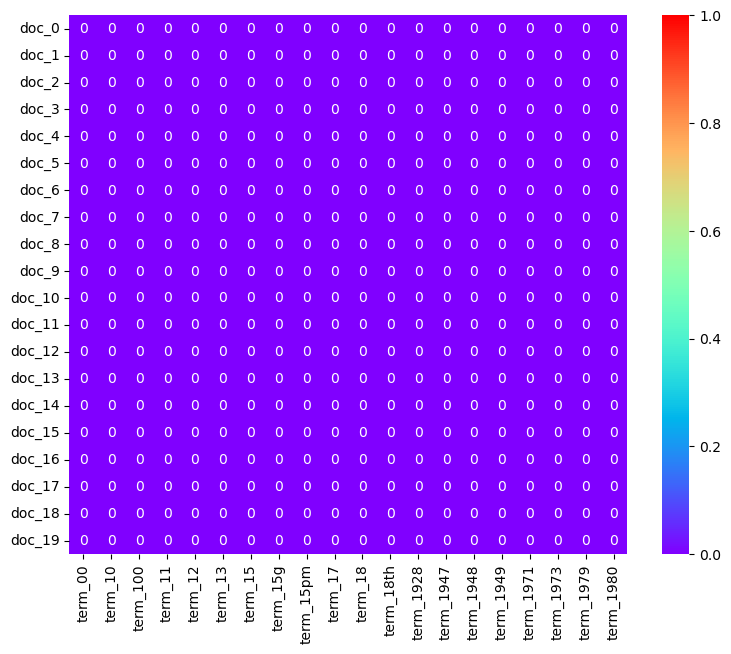

In [611]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = df_counts[0:20, 0:20].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="rainbow",
                 vmin=0, vmax=1, annot=True)

,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,...,term_3o,term_40,term_40min,term_42,term_44,term_45,term_4s,term_4ths,term_50,term_5020
doc_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


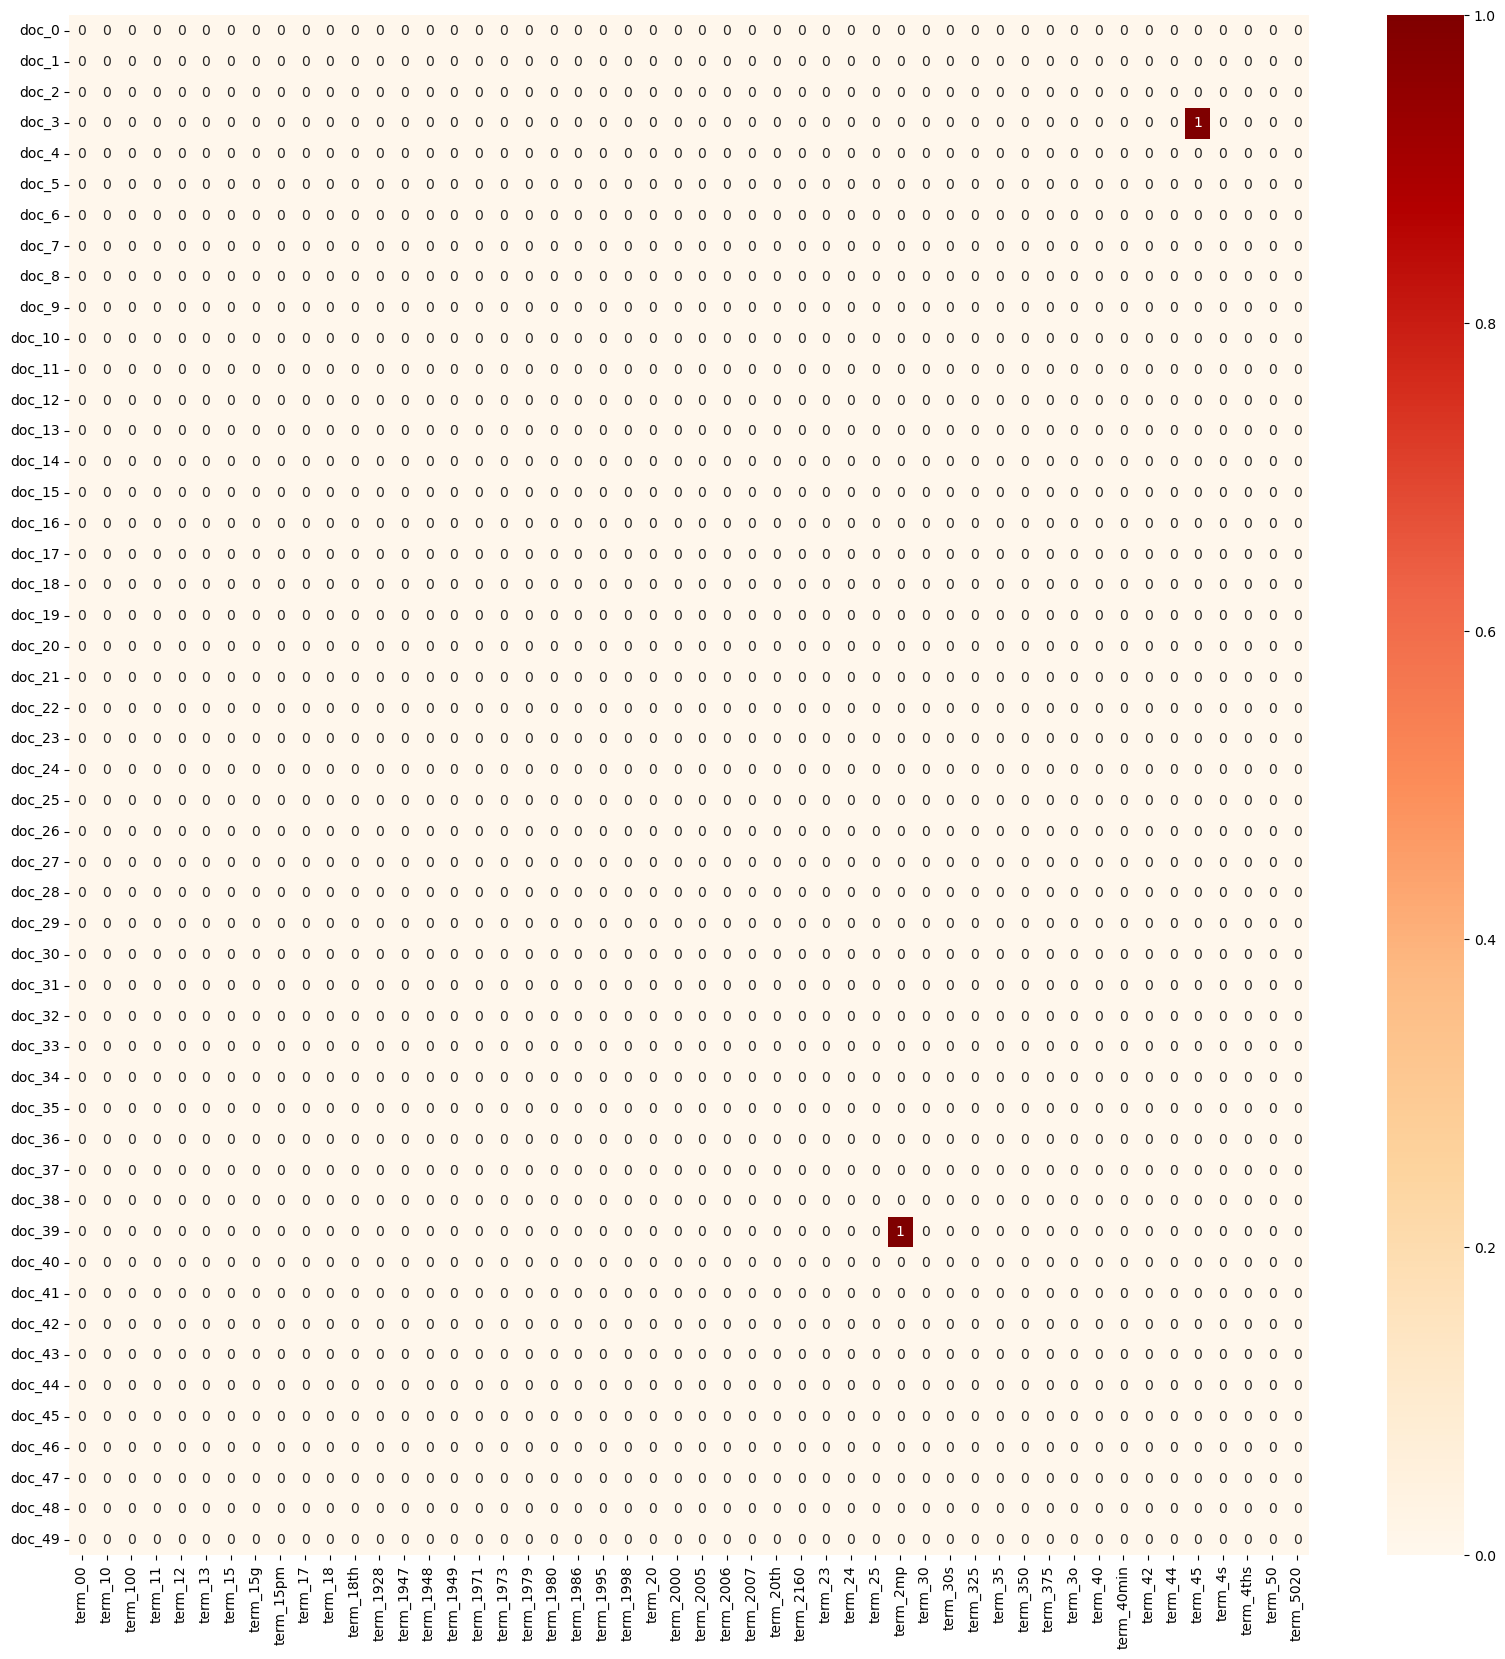

In [612]:
#Make a bigger heat map contains more information
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:50]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:50]]
plot_z = df_counts[0:50, 0:50].toarray()
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(20, 20))
ax = sns.heatmap(df_todraw,
                 cmap="OrRd",
                 vmin=0, vmax=1, annot=True)

### 4.4 Dimensionality Reduction

In [613]:
print(df_counts.shape)
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
print(df_reduced.shape)

(2714, 5153)
(2714, 2)


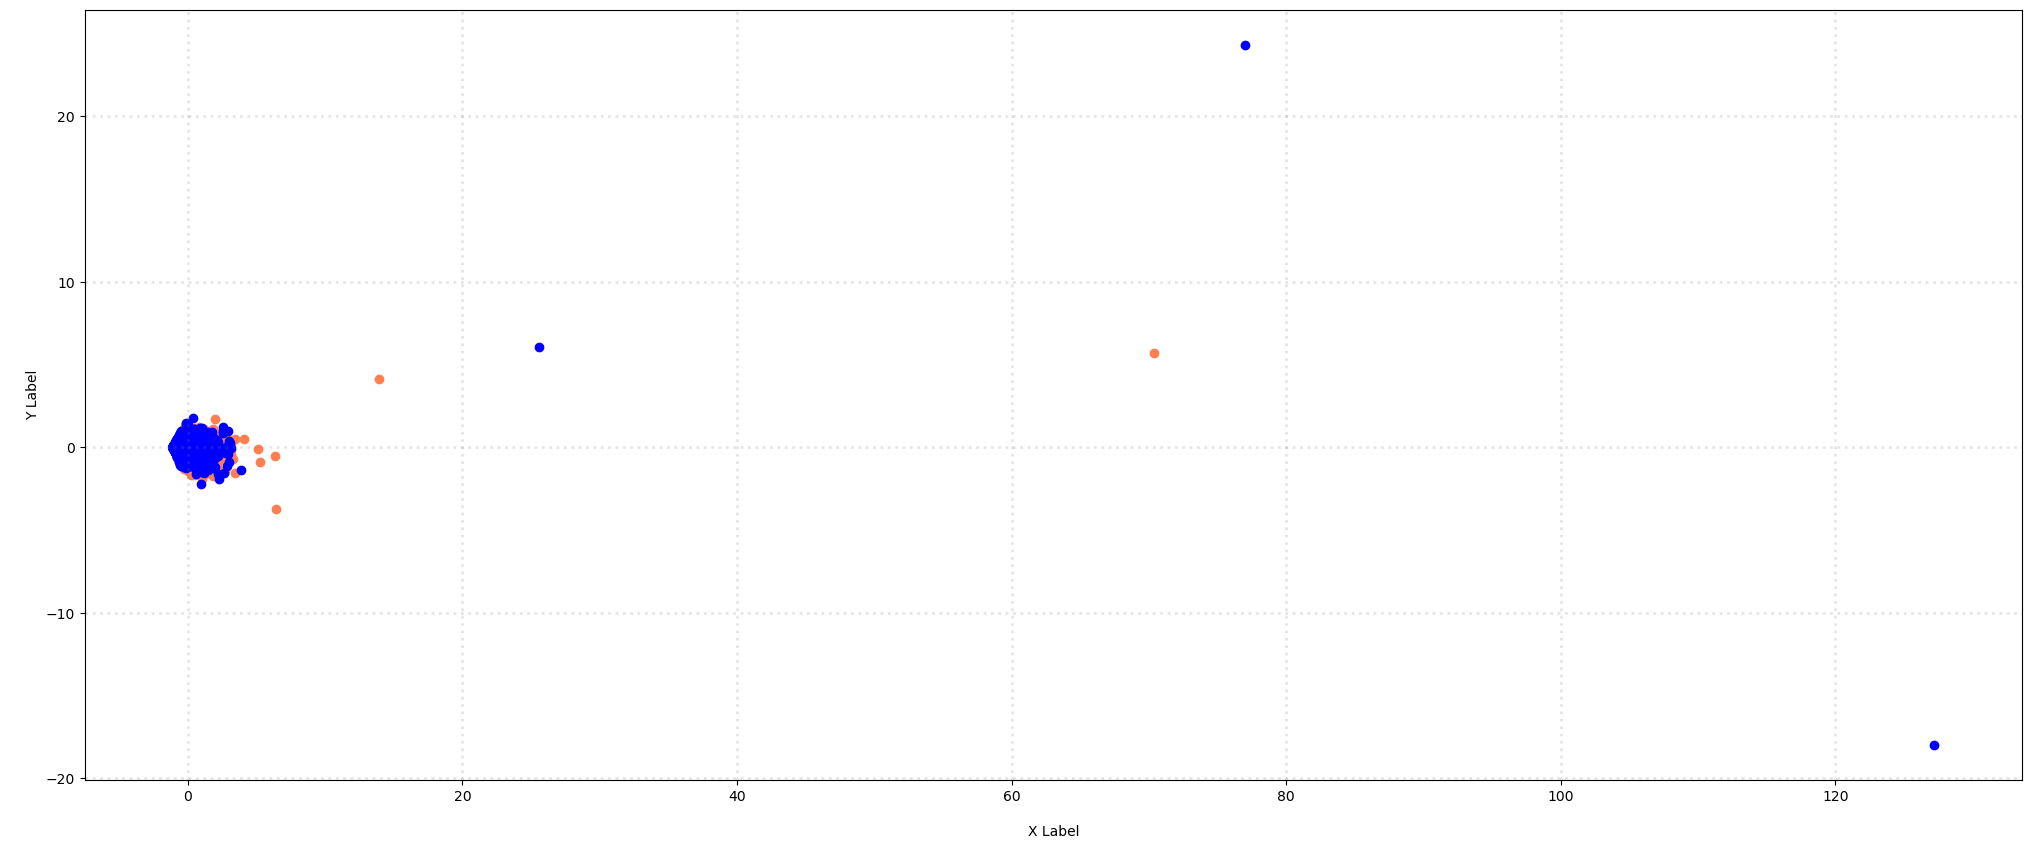

In [614]:
col = ['coral', 'blue']
labels = [1,0]
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, label in zip(col, labels):
    xs = df_reduced[df['label'] == label].T[0]
    ys = df_reduced[df['label'] == label].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

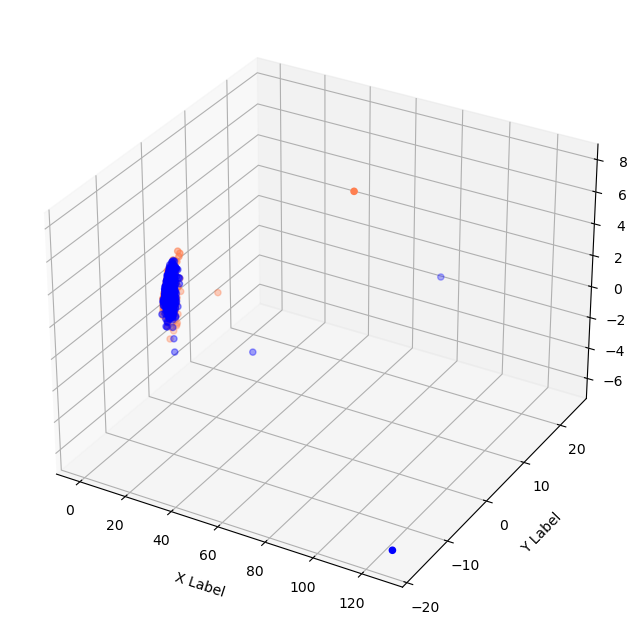

In [615]:
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue']

# plot
fig = plt.figure(figsize=(10, 8))
#ax = Axes3D(fig, elev=60, azim=30)
ax = fig.add_subplot(111, projection='3d')
df_reduced = PCA(n_components=3).fit_transform(df_counts.toarray())

for c, label in zip(col, labels):
    xs = df_reduced[df['label'] == label].T[0]
    ys = df_reduced[df['label'] == label].T[1]
    zs = df_reduced[df['label'] == label].T[2]
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

### 4.5 Attribute Transformation / Aggregation

In [616]:
term_frequencies = []
print(df_counts.shape[1])
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

5153


In [617]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [618]:
term_frequencies[0]

1

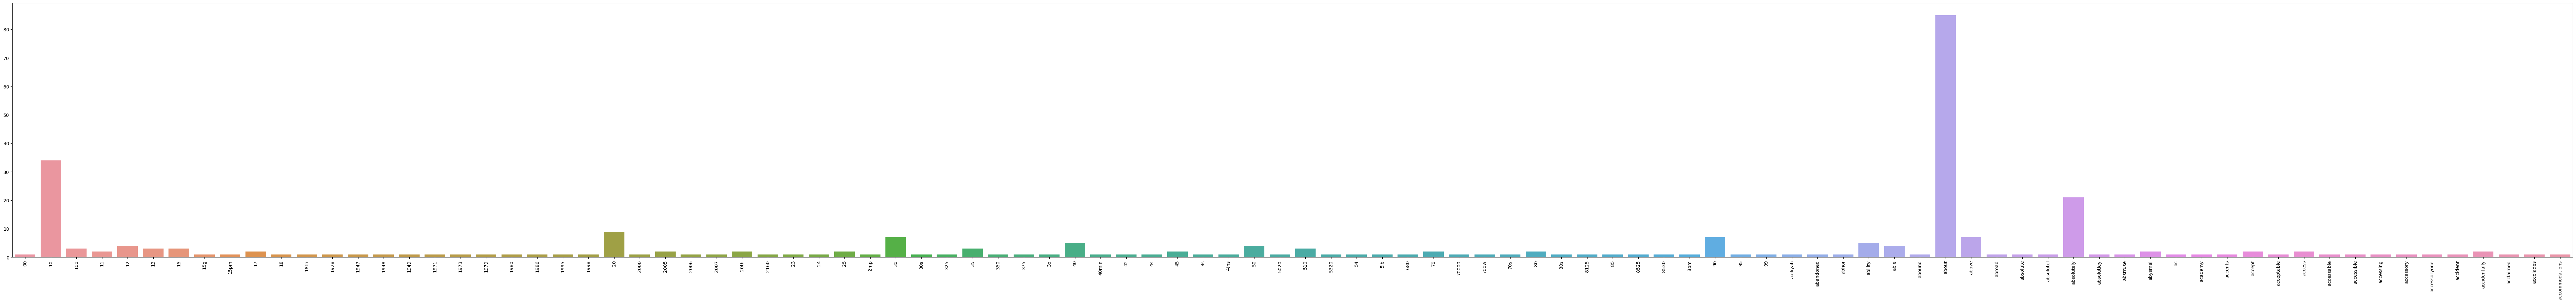

In [619]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:100], 
            y=term_frequencies[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90);

In [620]:
import plotly.express as px
import plotly.graph_objects as go

x_data = count_vect.get_feature_names()[:300]
y_data = term_frequencies[:300]

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=x_data,
        y=y_data,
    )
)

fig.update_layout(
    xaxis_title="Words",
    yaxis_title="Frequency",
    title_text="Word Frequency Bar Chart",
    title_x=0.5,  
    width=800,
    height=400,
)
fig.show()


C:\Users\Sandy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [717]:
# There are many words with really low frequency, so we can reserve words with Frequency > 3
filtered_x = [word for word, frequency in zip(x_data, y_data) if frequency > 3]
filtered_y = [frequency for frequency in y_data if frequency > 3]

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=filtered_x,
        y=filtered_y,
    )
)

fig.update_layout(
    xaxis_title="Words",
    yaxis_title="Frequency",
    title_text="Word Frequency Bar Chart (Frequency > 3)",
    title_x=0.5,
    width=800,
    height=400,
)
fig.show()


In [719]:
# Sort the data in descending order by frequency
sorted_data = sorted(zip(x_data, y_data), key=lambda item: item[1], reverse=True)
sorted_x, sorted_y = zip(*sorted_data)

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=sorted_x,
        y=sorted_y,
    )
)

fig.update_layout(
    xaxis_title="Words",
    yaxis_title="Frequency",
    title_text="Word Frequency Bar Chart (Long Tail)",
    title_x=0.5,
    width=800,
    height=400,
)
fig.show()

In [623]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


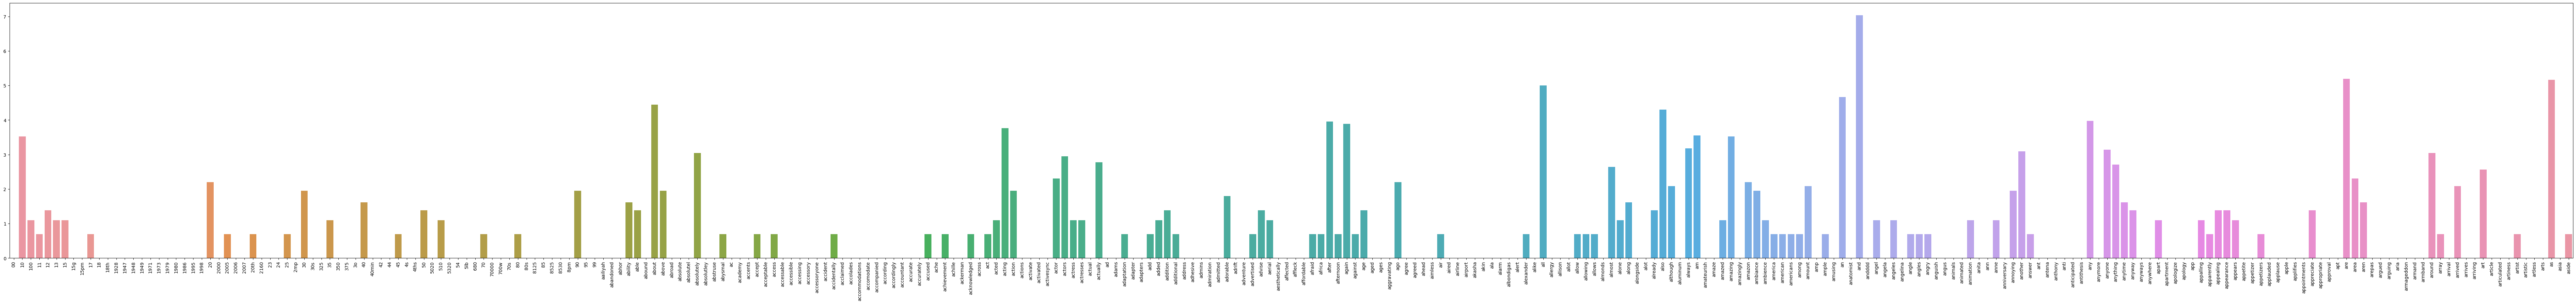

In [624]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### 4.6 Discretization and Binarization

In [625]:
mlb = preprocessing.LabelBinarizer()

In [626]:
mlb.fit(df.label)

LabelBinarizer()

In [627]:
df['bin_label'] = mlb.transform(df['label']).tolist()

In [628]:
df[0:9]

,sentences,label,unigrams,bin_label
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


In [629]:
mlb.fit(df.sentences)
df['bin_sentences'] = mlb.transform(df['sentences']).tolist()
df[0:9]

,sentences,label,unigrams,bin_label,bin_sentences
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,The mic is great.,1,"[The, mic, is, great, .]",[1],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...",[0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...",[1],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# 5. Data Exploration

In [630]:
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['sentences']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['sentences']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['sentences']
document_to_transform_3.append(random_record_3)

In [631]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [632]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [633]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# Part 3

### new data visualizations

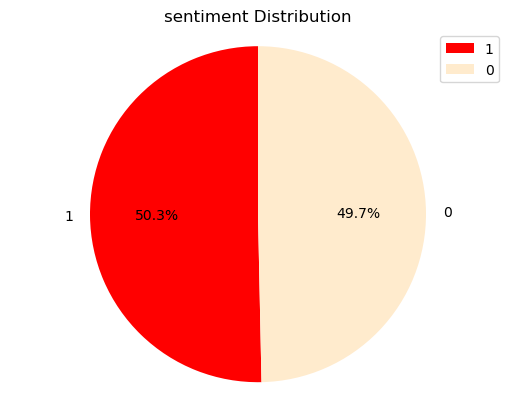

In [634]:
# Create a pie chart
import seaborn as sns
import matplotlib.pyplot as plt

label_counts = df['label'].value_counts()
labels = label_counts.index
counts = label_counts.values
mycolors = ["red", "blanchedalmond"]

plt.pie(counts, labels=labels, startangle = 90, autopct='%1.1f%%', colors = mycolors)
plt.title('sentiment Distribution')
plt.axis('equal')
plt.legend()
plt.show()


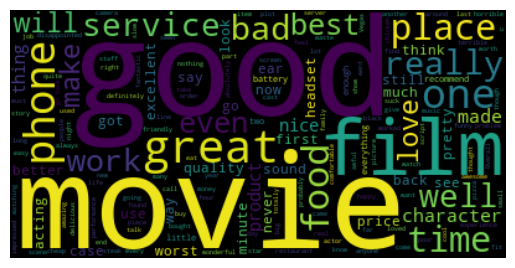

In [635]:
#透過文字雲觀察出現較多次的字
!pip install wordcloud
from wordcloud import WordCloud
text = ' '.join(df['sentences'])
wordcloud = WordCloud().generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Generate TF-IDF features

In [636]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['sentences'])
Y = vectorizer.get_feature_names_out()
print(X.shape)
print(Y.shape)

(2714, 5153)
(5153,)


In [637]:
df_X = pd.DataFrame(X.toarray(), columns = Y)

In [638]:
df_X

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### build two seperate classifiers

In [639]:
df_X['label']= df['label']
df_X

,00,10,100,11,12,13,15,15g,15pm,17,...,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [640]:
df_X.isnull().apply(lambda x: dmh.check_missing_values(x))['label']

0    The amoung of missing records is: 
1                                    34
Name: label, dtype: object

In [641]:
mode = df_X.mode().iloc[0]
df_X = df_X.fillna(mode)
df_X.isnull().apply(lambda x: dmh.check_missing_values(x))['label']

0    The amoung of missing records is: 
1                                     0
Name: label, dtype: object

In [642]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X_data, y_data = train_test_split(df_X, test_size=0.5, random_state=42)
X_train = X_data.iloc[:, :-1]
y_train = y_data.loc[:, "label"]
X_test = X_data.iloc[:, :-1]
y_test = y_data.loc[:, "label"]

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

auc = roc_auc_score(y_test, y_pred)

print("AUC Score:", auc)

AUC Score: 0.9041319657139382


In [643]:
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentences)

wff = pd.DataFrame(df_counts.toarray(), columns = count_vect.get_feature_names())
wff['label']= df['label']
wff

C:\Users\Sandy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,00,10,100,11,12,13,15,15g,15pm,17,...,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2710,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [644]:
wff.isnull().apply(lambda x: dmh.check_missing_values(x))['label']

0    The amoung of missing records is: 
1                                    34
Name: label, dtype: object

In [645]:
mode = wff.mode().iloc[0]
wff = wff.fillna(mode)
wff.isnull().apply(lambda x: dmh.check_missing_values(x))['label']

0    The amoung of missing records is: 
1                                     0
Name: label, dtype: object

In [646]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X_data, y_data = train_test_split(wff, test_size=0.5, random_state=42)
X_train = X_data.iloc[:, :-1]
y_train = y_data.loc[:, "label"]
X_test = X_data.iloc[:, :-1]
y_test = y_data.loc[:, "label"]

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

auc = roc_auc_score(y_test, y_pred)

print("AUC Score:", auc)

AUC Score: 0.8517699115044248


## Differences

From AUC score we can see that TF-IDF have higher score, it has better performance in this case.

# Part 4

In many graphs such as Word Frequency Bar Chart, Heat map we can see that they are meaningless if we do not do some data preprocessing. We can do things such and choose the more important terms filters out meaningless terms to make graphs more meaningful.